## Reinforcement Learning with OpenAI Gym
This is an implementation of Reinforcement Learning with the game Ball Sort Puzzle.

### Table of Contents

#### [Setup and Environment](#Setup_and_Environment)
- in this section, we download and examine the environment after importing all the necessary libraries;

#### [Reinforcement Learning](#Reinforcement_Learning)
- in this section, we use Q-learning and SARSA to solve the Ball Sort Puzzle problem.


## Setup and Environment <a name='Setup_and_Environment'></a>

1. install the necessary packages and libraries;
2. set up the Game environment; 
3. determine the state and action space for our Q-table.

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output
import environment

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Fixing seed for reproducibility
np.random.seed(0) 

In [3]:
#Loading and rendering the gym environment

env = environment.Environment([
            [1, 2, 1, 2],
            [2, 1, 2, 1],
            []
        ])
"""
env = environment.Environment([
            [1, 2, 3, 1],
            [2, 2, 3, 1],
            [3, 1, 2, 3],
            [],
            []
        ])

"""
env.reset()
env.render()

| 2 || 1 ||   |
| 1 || 2 ||   |
| 2 || 1 ||   |
| 1 || 2 ||   |
 ---  ---  --- 


In [4]:
#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(9)
State Space <tube.Game object at 0x000002420C71F460>


## Reinforcement Learning <a name='Reinforcement_Learning'></a>

1. initialize our Q-table given the state and action space in STEP 1;
    - choose the hyperparameters for training;
2. choose an action: explore or exploit in STEP 2;
3. perform the action and measure the reward in STEPs 3 & 4;
4. ^^
5. update the Q-table using the Bellman equation in STEP 5.
    - update the collected rewards
    - use decay to balance exploration and exploitation

In [5]:
#STEP 1 - Initializing the Q-table

print(env.observation_space.n)

Q = np.zeros((env.observation_space.n, env.action_space.n))
print(Q)

70
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0.

In [6]:
#Setting the hyperparameters
              
alpha = 0.5 #learning rate                 
discount_factor = 0.6
epsilon = 0.2
max_epsilon = 1
min_epsilon = 0.01
decay = 0.01  

train_episodes = 500
test_episodes = 100
max_steps = 50

#sarsa = False
sarsa=True

In [7]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []


#Function to choose the next action
def choose_action(state):
    action=0
    
    # FIRST option for choosing the initial action - explore       
    # Otherwise, employing exploration: choosing a random action 
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
        
    # SECOND option for choosing the initial action - exploit     
    # If the random number is larger than epsilon: employing exploitation 
    # and selecting best action 
    else:
        possible_actions = state.get_possible_actions()
        sorted_actions = np.sort(Q[env.get_index(state),:])
        for i in range(0, len(sorted_actions)):
            if i in possible_actions:
                action = i
                break
    return action
  
# Function to learn the Q-value, using SARSA
def updateSarsa(state, state2, reward, action, action2):
    predict = Q[env.get_index(state), action]
    target = reward + discount_factor * Q[env.get_index(state2), action2]
    Q[env.get_index(state), action] = predict + alpha * (target - predict)
    
# Function to learn the Q-value, using Q-Learning
def updateQ(state, state2, reward, action):
    predict = Q[env.get_index(state), action]
    target = reward + discount_factor * np.max(Q[env.get_index(state2), :])
    Q[env.get_index(state), action] = predict + alpha * (target - predict)
    

for episode in range(train_episodes):
    # Reseting the environment each time as per requirement
    state = env.reset()    
    # Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(max_steps):
        
        action = choose_action(state)
            
        # STEPs 3 & 4: performing the action and getting the reward     
        # Taking the action and getting the reward and outcome state
        new_state, reward, done, info = env.step(action)


        # STEP 5: update the Q-table
        # Updating the Q-table using the Bellman equation
        
        if(sarsa):
            action2 = choose_action(new_state)
            updateSarsa(state,new_state,reward,action,action2)
        else:
            updateQ(state,new_state,reward,action)

        # Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state
        env.state = new_state     
        
        # Ending the episode
        if done == True:
            print("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    # Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    if total_training_rewards < 0:
        print("Failed episode:", episode)

    # Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    

print("Training score over time: " + str(sum(training_rewards)/train_episodes))
print(Q)

Failed episode: 0
Total reward for episode 1: -1
Failed episode: 1
Total reward for episode 2: 10
Total reward for episode 3: 10
Total reward for episode 4: 10
Total reward for episode 5: 10
Total reward for episode 6: 10
Total reward for episode 7: 5
Total reward for episode 8: 10
Total reward for episode 9: 10
Total reward for episode 10: 10
Total reward for episode 11: 10
Total reward for episode 12: 10
Total reward for episode 13: 10
Total reward for episode 14: 9
Total reward for episode 15: 10
Total reward for episode 16: 10
Total reward for episode 17: 10
Total reward for episode 18: 9
Total reward for episode 19: 10
Total reward for episode 20: 10
Total reward for episode 21: 10
Total reward for episode 22: 10
Total reward for episode 23: 10
Total reward for episode 24: 10
Total reward for episode 25: 10
Total reward for episode 26: 10
Total reward for episode 27: 10
Total reward for episode 28: 10
Total reward for episode 29: 10
Total reward for episode 30: 10
Total reward for

Total reward for episode 268: 10
Total reward for episode 269: 10
Total reward for episode 270: 10
Total reward for episode 271: 9
Total reward for episode 272: 10
Total reward for episode 273: 10
Total reward for episode 274: 10
Total reward for episode 275: 10
Total reward for episode 276: 10
Total reward for episode 277: 10
Total reward for episode 278: 10
Total reward for episode 279: 10
Total reward for episode 280: 10
Total reward for episode 281: 10
Total reward for episode 282: 10
Total reward for episode 283: 10
Total reward for episode 284: 10
Total reward for episode 285: 10
Total reward for episode 286: 10
Total reward for episode 287: 10
Total reward for episode 288: 10
Total reward for episode 289: 10
Total reward for episode 290: 10
Total reward for episode 291: 10
Total reward for episode 292: 10
Total reward for episode 293: 10
Total reward for episode 294: 10
Total reward for episode 295: 10
Total reward for episode 296: 10
Total reward for episode 297: 10
Total rewar

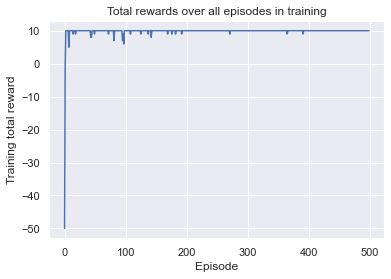

In [8]:
# Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

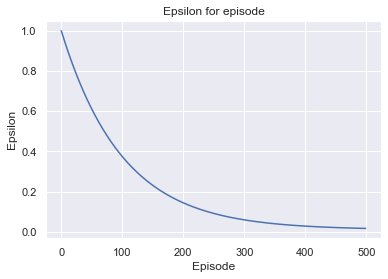

In [9]:
# Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()